In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Global variables
title_param = {'color': 'darkred', 'fontsize': 12}

In [3]:
# Read data
movies          = pd.read_pickle(r'datasets\movies.p')
financials      = pd.read_pickle(r'datasets\financials.p')
taglines        = pd.read_pickle(r'datasets\taglines.p')
casts           = pd.read_pickle(r'datasets\casts.p')
movie_to_genres = pd.read_pickle(r'datasets\movie_to_genres.p')
ratings         = pd.read_pickle(r'datasets\ratings.p')
sequels         = pd.read_pickle(r'datasets\sequels.p')
crews           = pd.read_pickle(r'datasets\crews.p')

actors_movies   = pd.read_csv(r'datasets\actors_movies.csv')

left_table      = pd.read_fwf('datasets\left_table.data')

# <font color=darkred>2. Merging Tables With Different Join Types</font>

Learn how you can merge disparate data using inner joins. By combining information from multiple sources you’ll uncover compelling insights that may have previously been hidden. You’ll also learn how the relationship between those sources, such as one-to-one or one-to-many, can affect your result.

# <font color=darkred>2.1 Left join</font>

**1. Left join**
>Greetings, and welcome back! In this lesson, we will discuss how a left join works, which is another way to merge two tables. Before we start talking about left joins, let's quickly review what we have learned so far.

**2. Quick review**
>In chapter 1, we introduced the pandas merge method that allows us to combine two tables by specifying one or more key columns to link the tables by. By default, the merge method performs an inner join, returning only the rows of data with matching values in the key columns of both tables.

**3. Left join**
>In this lesson, we'll talk about the idea of a left join. A left join returns all rows of data from the left table and only those rows from the right table where key columns match.

**4. Left join**
>Here we have two tables named left and right. We want to use a left join to merge them on key column C. A left join returns all of the rows from the left table and only those rows from the right table where column C matches in both. Notice the second row of the merged table. The columns from the left table are filled in, while the column from the right table is not since there wasn't a match found for that row in the right table. Let's review another example.

**5. New dataset**
>To help us learn more about left joins and other concepts in this chapter, we will use data from The Movie Database, a community-built movie database with info on thousands of movies, their casts, and popularity. In our next example, we have two tables from The Movie Database that we want to merge.

**6. Movies table**
>Our first table, named movies, holds information about individual movies such as the title name and its popularity. Additionally, each movie is given an ID number. Our table starts with 4,803 rows of data.

**7. Tagline table**
>Our second table is named taglines, which contains a movie ID number and the tag line for the movie. Notice that this table has almost 4,000 rows of data, so it contains fewer movies than the movies table.

**8. Merge with left join**
>To merge these two tables with a left join, we use our merge method similar to what we learned in chapter 1. Here we list the movie table first and merge it to the taglines table on the ID column in both tables. However, notice an additional argument named 'how'. This argument defines how to merge the two tables. In this case, we use 'left' for a left join. The default value for how is 'inner', so we didn't need to specify this in Chapter 1 since we were only working with inner joins. The result of the merge shows a table with all of the rows from the movies table and a value for tag line where the ID column matches in both tables. Wherever there isn't a matching ID in the taglines table, a null value is entered for the tag line. Remember that pandas uses NaN to denote missing data.

**9. Number of rows returned**
>After the merge, our resulting table has 4,805 rows. This is because we are returning all of the rows of data from the movies table, and the relationship between the movies table and taglines is one-to-one. Therefore, in a one-to-one merge like this one, a left join will always return the same number rows as the left table.

**10. Let's practice!**
>Now, let's practice some.

In [4]:
# Movies table
print(movies.shape)
movies.head()

(4803, 4)


,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [5]:
# Tagline table
print(taglines.shape)
taglines.head()

(3955, 2)


,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


In [6]:
# Merge with left join
movies_taglines = movies.merge(taglines, on='id', how='left')
movies_taglines.head()

,id,title,popularity,release_date,tagline
0,257,Oliver Twist,20.415572,2005-09-23,NaN
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.
2,38365,Grown Ups,38.864027,2010-06-24,Boys will be boys. . . some longer than others.
3,9672,Infamous,3.680896,2006-11-16,There's more to the story than you know
4,12819,Alpha and Omega,12.300789,2010-09-17,A Pawsome 3D Adventure


In [7]:
# Number of rows returned
print(movies_taglines.shape)

(4803, 5)


# <font color=darkred>2.2 Counting missing rows with left join</font>

The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the movies table and the financials table.

The movies and financials tables have been loaded for you.

**Instructions**

1. What column is likely the best column to merge the two tables on?
>**Possible Answers**
>- on='budget'
>- on='popularity'
>- <font color=red><u>on='id'</u></font>

2. Merge the movies table, as the left table, with the financials table using a left join, and save the result to movies_financials.
3. Count the number of rows in movies_financials with a null value in the budget column.

**Results**

<font color=darkgreen>Great job! You used a left join to find out which rows in the financials table were missing data. When performing a left join, the .merge() method returns a row full of null values for columns in the right table if the key column does not have a matching value in both tables. We see that there are at least 1,500 rows missing data. Wow! That sounds like a lot of work.</font>

In [8]:
print(movies.shape)
movies.head()

(4803, 4)


,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [9]:
print(financials.shape)
financials.head()

(3229, 3)


,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


In [10]:
# Merge movies and financials with a left join
movies_financials = movies.merge(financials, on="id", how='left')
print(movies_financials.shape)
movies_financials.head()

(4803, 6)


,id,title,popularity,release_date,budget,revenue
0,257,Oliver Twist,20.415572,2005-09-23,50000000.0,42093706.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,NaN,NaN
2,38365,Grown Ups,38.864027,2010-06-24,80000000.0,271430189.0
3,9672,Infamous,3.680896,2006-11-16,13000000.0,1151330.0
4,12819,Alpha and Omega,12.300789,2010-09-17,20000000.0,39300000.0


In [11]:
# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


# <font color=darkred>2.3 Enriching a dataset</font>

Setting how='left' with the .merge()method is a useful technique for enriching or enhancing a dataset with additional information from a different table. In this exercise, you will start off with a sample of movie data from the movie series Toy Story. Your goal is to enrich this data by adding the marketing tag line for each movie. You will compare the results of a left join versus an inner join.

The toy_story DataFrame contains the Toy Story movies. The toy_story and taglines DataFrames have been loaded for you.

**Instructions**
1. Merge toy_story and taglines on the id column with a left join, and save the result as toystory_tag.
2. With toy_story as the left table, merge to it taglines on the id column with an inner join, and save as toystory_tag.

**Results**

<font color=darkgreen>That's fantastic work! If your goal is to enhance or enrich a dataset, then you do not want to lose any of your original data. A left join will do that by returning all of the rows of your left table, while using an inner join may result in lost data if it does not exist in both tables.</font>

In [12]:
toy_story = movies[movies.title.str.contains('Toy Story', regex=False)]
toy_story

,id,title,popularity,release_date
103,10193,Toy Story 3,59.995418,2010-06-16
2637,863,Toy Story 2,73.575118,1999-10-30
3716,862,Toy Story,73.640445,1995-10-30


In [13]:
print(taglines.shape)
taglines.head()

(3955, 2)


,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


In [14]:
# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on='id', how='left')

# Print the rows and shape of toystory_tag
print(toystory_tag.shape)
toystory_tag

(3, 5)


,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995418,2010-06-16,No toy gets left behind.
1,863,Toy Story 2,73.575118,1999-10-30,The toys are back!
2,862,Toy Story,73.640445,1995-10-30,NaN


In [15]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on='id')

# Print the rows and shape of toystory_tag
print(toystory_tag.shape)
toystory_tag

(2, 5)


,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995418,2010-06-16,No toy gets left behind.
1,863,Toy Story 2,73.575118,1999-10-30,The toys are back!


# <font color=darkred>2.4 How many rows with a left join?</font>

Try running the following code statements in the console.

- left_table.merge(one_to_one, on='id', how='left').shape
- left_table.merge(one_to_many, on='id', how='left').shape

Note that the left_table starts out with 4 rows.

**Instructions**
1. Select the true statement about left joins.

**Possible Answers**
- The output of a one-to-one merge with a left join will have more rows than the left table.
- The output of a one-to-one merge with a left join will have fewer rows than the left table.
- <font color=red><u>The output of a one-to-many merge with a left join will have greater than or equal rows than the left table.</u></font>

**Results**

<font color=darkgreen>That's correct! A left join will return all of the rows from the left table. If those rows in the left table match multiple rows in the right table, then all of those rows will be returned. Therefore, the returned rows must be equal to if not greater than the left table. Knowing what to expect is useful in troubleshooting any suspicious merges.</font>

In [16]:
# Prepare the dataframes
one_to_one  = taglines
one_to_many = crews[['id', 'job', 'name']]

In [17]:
print("left_table", left_table.shape)
print(left_table, '\n\n')

print("one_to_one", one_to_one.shape)
print(one_to_one.head(2), '\n\n')

print("one_to_many", one_to_many.shape)
print(one_to_many.head(2))

left_table (4, 7)
   Unnamed: 0      id Unnamed: 2 Unnamed: 3                 title  popularity  \
0           0     329        NaN        NaN         Jurassic Park   40.413191   
1           1     330        The       Lost  World: Jurassic Park    2.502487   
2           2  135397        NaN        NaN        Jurassic World  418.708552   
3           3     331        NaN        NaN     Jurassic Park III    1.859364   

  release_date  
0   1993-06-11  
1   1997-05-23  
2   2015-06-09  
3   2001-07-18   


one_to_one (3955, 2)
      id                                         tagline
0  19995                     Enter the World of Pandora.
1    285  At the end of the world, the adventure begins. 


one_to_many (42502, 3)
      id             job               name
0  19995          Editor  Stephen E. Rivkin
2  19995  Sound Designer  Christopher Boyes


In [18]:
left_table.merge(one_to_one, on='id', how='left').shape

(4, 8)

In [19]:
left_table.merge(one_to_many, on='id', how='left').shape

(232, 9)

# <font color=darkred>2.5 Other joins</font>

**1. Other joins**
>All right, let's continue on. You now know how to use the merge method to perform an inner and left join. The merge method supports two other join types.

**2. Right join**
>Let's start with the right join. It will return all of the rows from the right table and includes only those rows from the left table that have matching values. It is the mirror opposite of the left join.

**3. Right join**
>These example tables show the result of a right join. Only rows from the left table where the column C matches are returned. Where there isn't a match, the columns from the left table will be missing in the result table, like rows one and four.

**4. Looking at data**
>For this lesson, let's look at another table called movie_to_genres. Movies can have multiple genres, and this table lists different genres for each movie.

**5. Filtering the data**
>For our right join example, let's take a sample of this data subsetting to develop a table of movies from the TV Movie genre.

**6. Data to merge**
>Our goal is to merge it with the movies table. We will set movies as our left table and merge it with the tv_genre table. We want to use a right join to check that our movies table is not missing data. In addition to showing a right join, this example also allows us to look at another feature. Notice that the column with the movie ID number in the movies table is named id, and in the tv_genre table it is named movie_id. The merge method has a feature to take this into account.

**7. Merge with right join**
>The code for this merge has some new elements. First of all, we set the how argument to right so that the merge performs a right join. Additionally, we introduce two new arguments, named left_on and right_on. They allow us to tell the merge which key columns from each table to merge the tables. We list movies as the left table, so we set left_on to id and right_on to movie_id. Our returned table has movies that match our table of tv_genres. There does not appear to be any null values in the columns from the movies table. We could explore further. However, let's move on to our last type of join.

**8. Outer join**
>Our last type of join is called an outer join. An outer join will return all of the rows from both tables regardless if there is a match between the tables.

**9. Outer join**
>Here is a simple example of an outer join. Where the key column used to join the tables has no match, null values are returned. That is why in the result, the columns from the left table are missing in rows one and five, and in column D row three is missing.

**10. Datasets for outer join**
>For an example of this, we filter the movie_to_genres table as before into two very small tables. One table has data on Family movies, and the other has Comedy movies.

**11. Merge with outer join**
>In this merge, we list the family table as the left table and merge it on the movie_id column. The how argument is set to outer for an outer join. Both of our tables have the same column names. Therefore, we add suffixes to show what table the columns originated. In our result table, every row is returned for both tables and we see some null values. In our original comedy tables ID number 12 does not exist. Therefore a null is shown. Similarly, in our last row, movie ID 13 wasn't in the family dataset so it has a null.

**12. Let's practice!**
>Let's practice!

In [20]:
tv_genre = movie_to_genres[movie_to_genres['genre'] == 'TV Movie']
print(tv_genre)

       movie_id     genre
4998      10947  TV Movie
5994      13187  TV Movie
7443      22488  TV Movie
10061     78814  TV Movie
10790    153397  TV Movie
10835    158150  TV Movie
11096    205321  TV Movie
11282    231617  TV Movie


In [21]:
# Merge with right join
tv_movies = movies.merge(tv_genre, how='right', left_on='id', right_on='movie_id')
print(tv_movies.head())

       id                      title  popularity release_date  movie_id  \
0   10947        High School Musical   16.536374   2006-01-20     10947   
1   13187  A Charlie Brown Christmas    8.701183   1965-12-09     13187   
2   22488         Love's Abiding Joy    1.128559   2006-10-06     22488   
3   78814       We Have Your Husband    0.102003   2011-11-12     78814   
4  153397                   Restless    0.812776   2012-12-07    153397   

      genre  
0  TV Movie  
1  TV Movie  
2  TV Movie  
3  TV Movie  
4  TV Movie  


In [22]:
# Datasets for outer join
m = movie_to_genres['genre'] == 'Family'
family = movie_to_genres[m].head(3)

m = movie_to_genres['genre'] == 'Comedy'
comedy = movie_to_genres[m].head(3)

# Merge with outer join
family_comedy = family.merge(comedy, on='movie_id', how='outer',
suffixes=('_fam', '_com'))
print(family_comedy)

   movie_id genre_fam genre_com
0        12    Family       NaN
1        35    Family    Comedy
2       105    Family       NaN
3         5       NaN    Comedy
4        13       NaN    Comedy


# <font color=darkred>2.6 Right join to find unique movies</font>

Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called scifi_movies and another table of action movies called action_movies. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the movies table in to see the movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.

The movies, scifi_movies, and action_movies tables have been loaded for you.

**Instructions**
1. Merge action_movies and scifi_movies tables with a right join on movie_id. Save the result as action_scifi.
2. Update the merge to add suffixes, where '_act' and '_sci' are suffixes for the left and right tables, respectively.
3. From action_scifi, subset only the rows where the genre_act column is null.
4. Merge movies and scifi_only using the id column in the left table and the movie_id column in the right table with an inner join.

**Results**

<font color=darkgreen>Well done, right join to the rescue! You found over 250 action only movies by merging action_movies and scifi_movies using a right join. With this, you were able to find the rows not found in the action_movies table. Additionally, you used the left_on and right_on arguments to merge in the movies table. Wow! You are a superhero.</font>

In [23]:
scifi_movies = movie_to_genres[movie_to_genres['genre'] == 'Science Fiction']
print('Science Fiction: ', scifi_movies.shape)
print(scifi_movies.head(2),'\n')

action_movies = movie_to_genres[movie_to_genres['genre'] == 'Action']
print('Action: ', action_movies.shape)
print(action_movies.head(2))

Science Fiction:  (535, 2)
    movie_id            genre
2         11  Science Fiction
17        18  Science Fiction 

Action:  (1154, 2)
    movie_id   genre
3         11  Action
14        18  Action


In [24]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right')
print('action_scifi: ', action_scifi.shape)
print(action_scifi.head(2), '\n\n')

# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right', suffixes=('_act', '_sci'))
print('action_scifi: ', action_scifi.shape)
print(action_scifi.head(2), '\n\n')

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi.genre_act.isnull()]
print('scifi_only: ', scifi_only.shape)
print(scifi_only.head(2), '\n\n')

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on='id', right_on='movie_id')

# Print the first few rows and shape of movies_and_scifi_only
print('movies_and_scifi_only: ', movies_and_scifi_only.shape)
print(movies_and_scifi_only.head(2))

action_scifi:  (535, 3)
   movie_id genre_x          genre_y
0        11  Action  Science Fiction
1        18  Action  Science Fiction 


action_scifi:  (535, 3)
   movie_id genre_act        genre_sci
0        11    Action  Science Fiction
1        18    Action  Science Fiction 


scifi_only:  (258, 3)
   movie_id genre_act        genre_sci
2        19       NaN  Science Fiction
3        38       NaN  Science Fiction 


movies_and_scifi_only:  (258, 7)
      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841   
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  


In [25]:
# Simplify the code
movies_and_scifi_only = action_movies.merge(scifi_movies, on='movie_id', how='right', suffixes=('_act', '_sci')) \
                                     .merge(movies, left_on='movie_id', right_on='id').query('genre_act.isnull()')

# Print the first few rows and shape of movies_and_scifi_only
print('movies_and_scifi_only: ', movies_and_scifi_only.shape)
print(movies_and_scifi_only.head(2))

movies_and_scifi_only:  (258, 7)
   movie_id genre_act        genre_sci  id  \
2        19       NaN  Science Fiction  19   
3        38       NaN  Science Fiction  38   

                                   title  popularity release_date  
2                             Metropolis   32.351527   1927-01-10  
3  Eternal Sunshine of the Spotless Mind   56.481487   2004-03-19  


# <font color=darkred>2.7 Popular genres with right join</font>

What are the genres of the most popular movies? To answer this question, you need to merge data from the movies and movie_to_genres tables. In a table called pop_movies, the top 10 most popular movies in the movies table have been selected. To ensure that you are analyzing all of the popular movies, merge it with the movie_to_genres table using a right join. To complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie ID. However, in pop_movies that column is called id, and in movies_to_genres it's called movie_id.

The pop_movies and movie_to_genres tables have been loaded for you.

**Instructions**
1. Merge movie_to_genres and pop_movies using a right join. Save the results as genres_movies.
2. Group genres_movies by genre and count the number of id values.

**Results**

<font color=darkgreen>Nice job! The right join ensured that you were analyzing all of the pop_movies. You see from the results that adventure and action are the most popular genres.</font>

In [26]:
pop_movies = movies.sort_values('popularity', ascending=False).iloc[:10]
pop_movies

,id,title,popularity,release_date
4546,211672,Minions,875.581305,2015-06-17
4343,157336,Interstellar,724.247784,2014-11-05
1966,293660,Deadpool,514.569956,2016-02-09
2423,118340,Guardians of the Galaxy,481.098624,2014-07-30
4220,76341,Mad Max: Fury Road,434.278564,2015-05-13
1867,135397,Jurassic World,418.708552,2015-06-09
4375,22,Pirates of the Caribbean: The Curse of the Bla...,271.972889,2003-07-09
1106,119450,Dawn of the Planet of the Apes,243.791743,2014-06-26
4216,131631,The Hunger Games: Mockingjay - Part 1,206.227151,2014-11-18
2614,177572,Big Hero 6,203.734590,2014-10-24


In [27]:
print(movie_to_genres.shape)
movie_to_genres.head()

(12160, 2)


,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


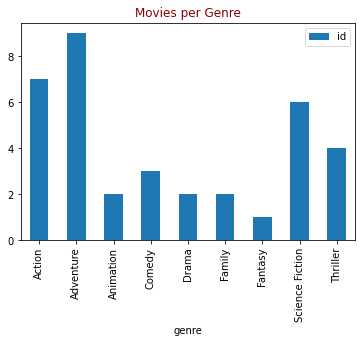

In [28]:
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', left_on='movie_id', right_on='id')

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.title('Movies per Genre', **title_param)
plt.show()

# <font color=darkred>2.8 Using outer join to select actors</font>

One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. To try for yourself, you have been given two tables with a list of actors from two popular movies: Iron Man 1 and Iron Man 2. Most of the actors played in both movies. Use an outer join to find actors who did not act in both movies.

The Iron Man 1 table is called iron_1_actors, and Iron Man 2 table is called iron_2_actors. Both tables have been loaded for you and a few rows printed so you can see the structure.

<img src="images/noJoin.png" width="30%"/>

**Instructions**
1. Save to iron_1_and_2 the merge of iron_1_actors (left) with iron_2_actors tables with an outer join on the id column, and set suffixes to ('_1','_2').
2. Create an index that returns True if name_1 or name_2 are null, and False otherwise.

**Results**

<font color=darkgreen>Nice job! Using an outer join, you were able to pick only those rows where the actor played in only one of the two movies.</font>

In [29]:
iron_1_actors = casts[casts.movie_id.isin(movies[movies.title=='Iron Man'].id.values)][['character', 'id', 'name']]
print('iron_1_actors: ', iron_1_actors.shape)
print(iron_1_actors.head(2), '\n\n')

iron_2_actors = casts[casts.movie_id.isin(movies[movies.title=='Iron Man 2'].id.values)][['character', 'id', 'name']]
print('action_scifi: ', iron_2_actors.shape)
print(iron_2_actors.head(2), '\n\n')

iron_1_actors:  (87, 3)
                 character     id             name
3                   Yinsen  17857       Shaun Toub
4  Virginia "Pepper" Potts  12052  Gwyneth Paltrow 


action_scifi:  (115, 3)
                                          character    id                name
4                             Ivan Vanko / Whiplash  2295       Mickey Rourke
3  Natalie Rushman / Natasha Romanoff / Black Widow  1245  Scarlett Johansson 




In [30]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors, on='id', how='outer', suffixes=('_1', '_2'))

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | 
     (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

                                    character_1      id           name_1  \
0                                        Yinsen   17857       Shaun Toub   
2                   Obadiah Stane / Iron Monger    1229     Jeff Bridges   
3  Lt. Col. James "Rhodey" Rhodes / War Machine   18288  Terrence Howard   
5                                          Raza   57452      Faran Tahir   
8                                    Abu Bakaar  173810    Sayed Badreya   

  character_2 name_2  
0         NaN    NaN  
2         NaN    NaN  
3         NaN    NaN  
5         NaN    NaN  
8         NaN    NaN  


# <font color=darkred>2.9 Merging a table to itself</font>

**1. Merging a table to itself**
>Hello again! In this lesson, we will talk about merging a table to itself. This type of merge is also referred to as a self join. So, let's get started.

**2. Sequel movie data**
>So when would you ever need to merge a table to itself? The table shown here is called sequels and has three columns. It contains a column for movie id, title, and sequel. The sequel number refers to the movie id that is a sequel to the original movie. For example, in the second row the movie is titled Toy Story, and has an id equal to 862. The sequel number of this row is 863. This is the movie id for Toy Story 2, the sequel to Toy Story. If we continue, 10193 is the movie id Toy Story 3 which is the sequel for Toy Story 2.

**3. Merging a table to itself**
>If we would like to see a table with the movies and the corresponding sequel movie in one row of the table, we will need to merge the table to itself. In the left table, the sequel ID for Toy Story of 863 is matched with 863 in the ID column of the right table. Similarly, Toy Story 2 of the left table is matched with Toy Story 3 in the right table. We will talk more about this later, but the merge is an inner join. Therefore, we do not see Avatar and Titanic because they do not have sequels.

**4. Merging a table to itself**
>To complete this merge, we set the sequels table as input to the merge method for both the left and right tables. We can think of it as merging two copies of the same table. All of the aspects we have reviewed regarding merging two tables still apply here. Therefore, we can merge the tables on different columns. We'll use the 'left_on' and 'right_on' attributes to match rows where the sequel's id matches the original movie's id. Finally, setting the suffixes argument in the merge method allows us to identify which columns describe the original movie and which describe the sequel. When we look at the results of the merge, the 'title_org' and 'title_seq' list the original and sequel movies, respectively. Here we listed the original movie and its sequel in one row.

**5. Continue format results**
>Now that we have our result table from the merge, we could select only the `title_org`, and `title_seq` columns, and we can see that we've successfully linked each movie to its sequel.

**6. Merging a table to itself with left join**
>Pausing here is a good time to highlight again that when merging a table to itself, we can use the different types of joins we have already reviewed. Let's take the same merge from earlier but make it a left join. The 'how' argument is set in the merge method to left from the default 'inner'. Now the resulting table will show all of our original movie info. If the sequel movie exists in the table, it will fill out the rest of the row. If you compare this to our earlier merger, you now see movies like Avatar and Titanic in the result set.

**7. When to merge at table to itself**
>You might need to merge a table to itself when working with tables that have a hierarchical relationship, like employee and manager. You might use this on sequential relationships such as logistic movements. Graph data, such as networks of friends, might also require this technique.

**8. Let's practice!**
>Alright, let's practice merging a table to itself.

In [31]:
# Sequel movie data
print('sequels: ', sequels.shape)
sequels.head()

sequels:  (4803, 3)


,id,title,sequel
0,19995,Avatar,<NA>
1,862,Toy Story,863
2,863,Toy Story 2,10193
3,597,Titanic,<NA>
4,24428,The Avengers,<NA>


In [32]:
# Merging a table to itself
original_sequels = sequels.merge(sequels, left_on='sequel', right_on='id', suffixes=('_org','_seq'))
print('original_sequels: ', original_sequels.shape)
original_sequels.head()

original_sequels:  (90, 6)


,id_org,title_org,sequel_org,id_seq,title_seq,sequel_seq
0,862,Toy Story,863,863,Toy Story 2,10193
1,863,Toy Story 2,10193,10193,Toy Story 3,<NA>
2,675,Harry Potter and the Order of the Phoenix,767,767,Harry Potter and the Half-Blood Prince,<NA>
3,121,The Lord of the Rings: The Two Towers,122,122,The Lord of the Rings: The Return of the King,<NA>
4,120,The Lord of the Rings: The Fellowship of the Ring,121,121,The Lord of the Rings: The Two Towers,122


In [33]:
# Continue format results
original_sequels.loc[:,['title_org','title_seq']].head()

,title_org,title_seq
0,Toy Story,Toy Story 2
1,Toy Story 2,Toy Story 3
2,Harry Potter and the Order of the Phoenix,Harry Potter and the Half-Blood Prince
3,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Return of the King
4,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Two Towers


In [34]:
# Merging a table to itself with left join
original_sequels = sequels.merge(sequels, left_on='sequel', right_on='id', how='left', suffixes=('_org','_seq'))
original_sequels.head()

,id_org,title_org,sequel_org,id_seq,title_seq,sequel_seq
0,19995,Avatar,<NA>,<NA>,NaN,<NA>
1,862,Toy Story,863,863,Toy Story 2,10193
2,863,Toy Story 2,10193,10193,Toy Story 3,<NA>
3,597,Titanic,<NA>,<NA>,NaN,<NA>
4,24428,The Avengers,<NA>,<NA>,NaN,<NA>


# <font color=darkred>2.10 Self join</font>

Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. You have been given a table called crews, which has columns id, job, and name. First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.

The crews table has been loaded for you.

**Instructions**
1. To a variable called crews_self_merged, merge the crews table to itself on the id column using an inner join, setting the suffixes to '_dir' and '_crew' for the left and right tables respectively.
2. Create a Boolean index, named boolean_filter, that selects rows from the left table with the job of 'Director' and avoids rows with the job of 'Director' in the right table.
3. Use the .head() method to print the first few rows of direct_crews.

**Results**

<font color=darkgreen>...</font>

In [35]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', suffixes=('_dir', '_crew'))
crews_self_merged.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
0,19995,Editing,Editor,Stephen E. Rivkin,Editing,Editor,Stephen E. Rivkin
1,19995,Editing,Editor,Stephen E. Rivkin,Sound,Sound Designer,Christopher Boyes
2,19995,Editing,Editor,Stephen E. Rivkin,Production,Casting,Mali Finn
3,19995,Editing,Editor,Stephen E. Rivkin,Directing,Director,James Cameron
4,19995,Editing,Editor,Stephen E. Rivkin,Writing,Writer,James Cameron


In [36]:
# Create a Boolean index to select the appropriate
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
     (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]
direct_crews.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays


# <font color=darkred>2.11 How does pandas handle self joins?</font>

**Instructions**
1. Select the false statement about merging a table to itself.

**Possible Answers**
- You can merge a table to itself with a right join.
- Merging a table to itself can allow you to compare values in a column to other values in the same column.
- <u><font color=red>The Pandas module limits you to one merge where you merge a table to itself. You cannot repeat this process over and over.</font></u>
- Merging a table to itself is like working with two separate tables.

**Results**

<font color=darkgreen>Perfect! This statement is false. Pandas treats a merge of a table to itself the same as any other merge. Therefore, it does not limit you from chaining multiple .merge() methods together.</font>

# <font color=darkred>2.12 Merging on indexes</font>

**1. Merging on indexes**
>So far, we've only looked at merging two tables together using their columns. In this lesson, we'll discuss how to merge tables using their indexes. Often, the DataFrame indexes are given a unique id that we can use when merging two tables together.

**2. Table with an index**
>Here, we show the movies table that was introduced earlier in this chapter. The index is the default 0, 1, 2, 3, etc., auto-increment. In this second version, the id column is the index for the table.

**3. Setting an index**
>There are different methods to set the index of a table, but if our data starts off in a CSV file, we can use the index_col argument of the read_csv method. This lesson will not focus on how to set a table index, but how to use that index to merge two tables together.

**4. Merge index datasets**
>Recall our example to merge the movies and taglines tables using the id column with a left join. Let's recreate that merge using the index which is now the id for tables.

**5. Merging on index**
>Our merge statement looks identical to before. However, in this case we are inputting to the 'on' argument the index level name which is called 'id'. The merge method automatically adjusts to accept index names or column names. The returned table looks as before, except the 'id' is the index.

**6. MultiIndex datasets**
>Let's try a multiIndex merge. Here, we have two tables with a multiIndex that holds the movie ID and cast ID. The first table, named 'samuel', has the movie and cast ID for a group of movies that Samuel L. Jackson acted in. The second table, named cast, has the movie ID and cast ID for a number of movie characters. Let's merge these two tables on their multiIndex.

**7. MultiIndex merge**
>In this merge, we pass in a list of index level names to the 'on' argument, just like we did when merging on multiple columns. Since this is an inner join, both the movie_id and cast_id must match in each table to be returned in the result. It's interesting to see that Samuel Jackson has acted in over 65 movies! That's a lot.

**8. Index merge with left_on and right_on**
>There is one more thing regarding merging on indexes. If the index level names are different between the two tables that we want to merge, then we can use the left_on and right_on arguments of the merge method. Let's go back to our movies table, shown in the top panel, and merge it with our movies_to_genres table, shown in the lower panel.

**9. Index merge with left_on and right_on**
>In this merge, since we list the movies table as the left table, we set left_on equal to id and right_on equal to movie_id. Additionally, since we are merging on indexes, we need to set left_index and right_index to True. These arguments take only True or False. Whenever we are using the left_on or right_on arguments with an index, we need to set the respective left_index and right_index arguments to True. The left_index and right_index tell the merge method to use the separate indexes.

**10. Let's practice!**
>Now it's time for you try out a few exercises.

In [37]:
# Setting an index
movies_i = movies.set_index('id')
print('** movies_i')
print(movies_i.head(2), '\n\n')

taglines_i = taglines.set_index('id')
print('** taglines_i')
print(taglines_i.head(2), '\n\n')

samuel_i = casts[casts.name=='Samuel L. Jackson'].set_index(['movie_id', 'cast_id'])[['name']]
print('** samuel_i')
print(samuel_i.head(2), '\n\n')

casts_i = casts.set_index(['movie_id', 'cast_id'])[['character']]
print('** casts_i')
print(casts_i.head(2), '\n\n')

genres_i = movie_to_genres.set_index('movie_id')
print('** genres_i')
print(genres_i.head(2), '\n\n')

ratings_i = ratings.set_index('id')
print('** ratings_i')
print(ratings_i.head(2))

** movies_i
                      title  popularity release_date
id                                                  
257            Oliver Twist   20.415572   2005-09-23
14290  Better Luck Tomorrow    3.877036   2002-01-12 


** taglines_i
                                              tagline
id                                                   
19995                     Enter the World of Pandora.
285    At the end of the world, the adventure begins. 


** samuel_i
                               name
movie_id cast_id                   
184      3        Samuel L. Jackson
319      13       Samuel L. Jackson 


** casts_i
                 character
movie_id cast_id          
5        22        Jezebel
         23          Diana 


** genres_i
           genre
movie_id        
5          Crime
5         Comedy 


** ratings_i
       vote_average  vote_count
id                             
19995           7.2     11800.0
285             6.9      4500.0


In [38]:
# Merging on index
movies_taglines = movies_i.merge(taglines_i, on='id', how='left')
print(movies_taglines.head())

                      title  popularity release_date  \
id                                                     
257            Oliver Twist   20.415572   2005-09-23   
14290  Better Luck Tomorrow    3.877036   2002-01-12   
38365             Grown Ups   38.864027   2010-06-24   
9672               Infamous    3.680896   2006-11-16   
12819       Alpha and Omega   12.300789   2010-09-17   

                                               tagline  
id                                                      
257                                                NaN  
14290             Never underestimate an overachiever.  
38365  Boys will be boys. . . some longer than others.  
9672           There's more to the story than you know  
12819                           A Pawsome 3D Adventure  


In [39]:
# MultiIndex merge
samuel_casts = samuel_i.merge(casts_i, on=['movie_id','cast_id'])
print(samuel_casts.shape)
samuel_casts.head()

(67, 2)


,,name,character
movie_id,cast_id,,
184,3,Samuel L. Jackson,Ordell Robbie
319,13,Samuel L. Jackson,Big Don
326,2,Samuel L. Jackson,Neville Flynn
329,138,Samuel L. Jackson,Arnold
393,21,Samuel L. Jackson,Rufus


In [40]:
# Index merge with left_on and right_on
movies_genres = movies_i.merge(genres_i, left_on='id', right_index=True)
print(movies_genres.head())

                      title  popularity release_date   genre
id                                                          
257            Oliver Twist   20.415572   2005-09-23   Crime
257            Oliver Twist   20.415572   2005-09-23   Drama
257            Oliver Twist   20.415572   2005-09-23  Family
14290  Better Luck Tomorrow    3.877036   2002-01-12   Crime
14290  Better Luck Tomorrow    3.877036   2002-01-12   Drama


# <font color=darkred>2.13 Index merge for movie ratings</font>

To practice merging on indexes, you will merge movies and a table called ratings that holds info about movie ratings. Make sure your merge returns all of the rows from the movies table and not all the rows of ratings table need to be included in the result.

The movies and ratings tables have been loaded for you.

**Instructions**
1. Merge movies and ratings on the index and save to a variable called movies_ratings, ensuring that all of the rows from the movies table are returned.

**Results**

<font color=darkgreen>Good work! Merging on indexes is just like merging on columns, so if you need to merge based on indexes, there's no need to turn the indexes into columns first.</font>

In [41]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies_i.merge(ratings_i, how='left', on='id')

# Print the first few rows of movies_ratings
movies_ratings.head()

,title,popularity,release_date,vote_average,vote_count
id,,,,,
257,Oliver Twist,20.415572,2005-09-23,6.7,274.0
14290,Better Luck Tomorrow,3.877036,2002-01-12,6.5,27.0
38365,Grown Ups,38.864027,2010-06-24,6.0,1705.0
9672,Infamous,3.680896,2006-11-16,6.4,60.0
12819,Alpha and Omega,12.300789,2010-09-17,5.3,124.0


# <font color=darkred>2.14 Do sequels earn more?</font>

It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the sequels and financials tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the sequels table and not all the rows of financials table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

The sequels and financials tables have been provided.

**Instructions**
1. With the sequels table on the left, merge to it the financials table on index named id, ensuring that all the rows from the sequels are returned and some rows from the other table may not be returned, Save the results to sequels_fin.
2. Merge the sequels_fin table to itself with an inner join, where the left and right tables merge on sequel and id respectively with suffixes equal to ('_org','_seq'), saving to orig_seq.
3. Select the title_org, title_seq, and diff columns of orig_seq and save this as titles_diff.
4. Sort by titles_diff by diff in descending order and print the first few rows.

**Results**

<font color=darkgreen>Amazing, that was great work! To complete this exercise, you needed to merge tables on their index and merge another table to itself. After the calculations were added and sub-select specific columns, the data was sorted. You found out that Jurassic World had one of the highest of all, improvement in revenue compared to the original movie.</font>

In [42]:
# Preparing the tables
sequels_i = sequels.set_index('id')
sequels_i.sequel.fillna(0, inplace=True)
print('** sequels_i: ', sequels_i.shape)
print(sequels_i.head(), '\n\n')

financials_i = financials.set_index('id')
print('** financials_i: ', financials_i.shape)
print(financials_i.head())

** sequels_i:  (4803, 2)
              title  sequel
id                         
19995        Avatar       0
862       Toy Story     863
863     Toy Story 2   10193
597         Titanic       0
24428  The Avengers       0 


** financials_i:  (3229, 2)
           budget       revenue
id                             
19995   237000000  2.787965e+09
285     300000000  9.610000e+08
206647  245000000  8.806746e+08
49026   250000000  1.084939e+09
49529   260000000  2.841391e+08


In [43]:
# Merge sequels and financials on index id
sequels_fin = sequels_i.merge(financials_i, how='left', on='id')
sequels_fin.head()

,title,sequel,budget,revenue
id,,,,
19995,Avatar,0,237000000.0,2.787965e+09
862,Toy Story,863,30000000.0,3.735540e+08
863,Toy Story 2,10193,90000000.0,4.973669e+08
597,Titanic,0,200000000.0,1.845034e+09
24428,The Avengers,0,220000000.0,1.519558e+09


In [44]:
# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, 
                             left_on='sequel', right_index=True, 
                             suffixes=['_org','_seq'])

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']
orig_seq.head()

,sequel,title_org,sequel_org,budget_org,revenue_org,title_seq,sequel_seq,budget_seq,revenue_seq,diff
id,,,,,,,,,,
862,863,Toy Story,863,30000000.0,373554033.0,Toy Story 2,10193,90000000.0,4.973669e+08,123812836.0
863,10193,Toy Story 2,10193,90000000.0,497366869.0,Toy Story 3,0,200000000.0,1.066970e+09,569602834.0
675,767,Harry Potter and the Order of the Phoenix,767,150000000.0,938212738.0,Harry Potter and the Half-Blood Prince,0,250000000.0,9.339592e+08,-4253541.0
121,122,The Lord of the Rings: The Two Towers,122,79000000.0,926287400.0,The Lord of the Rings: The Return of the King,0,94000000.0,1.118889e+09,192601579.0
120,121,The Lord of the Rings: The Fellowship of the Ring,121,93000000.0,871368364.0,The Lord of the Rings: The Two Towers,122,79000000.0,9.262874e+08,54919036.0


In [45]:
# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org', 'title_seq', 'diff']]
titles_diff.head()

,title_org,title_seq,diff
id,,,
862,Toy Story,Toy Story 2,123812836.0
863,Toy Story 2,Toy Story 3,569602834.0
675,Harry Potter and the Order of the Phoenix,Harry Potter and the Half-Blood Prince,-4253541.0
121,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Return of the King,192601579.0
120,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Two Towers,54919036.0


In [46]:
# Print the first rows of the sorted titles_diff
titles_diff.sort_values('diff', ascending=False).head()

,title_org,title_seq,diff
id,,,
331,Jurassic Park III,Jurassic World,1.144748e+09
272,Batman Begins,The Dark Knight,6.303398e+08
10138,Iron Man 2,Iron Man 3,5.915067e+08
863,Toy Story 2,Toy Story 3,5.696028e+08
10764,Quantum of Solace,Skyfall,5.224703e+08


# Aditional material

- Datacamp course: https://learn.datacamp.com/courses/joining-data-with-pandas